In [1]:
import nibabel as nib
import numpy as np
import glob
from nilearn.glm import threshold_stats_img
from nilearn.image import resample_img
import pandas as pd 
import os
import statistics
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from nilearn.image import resample_img
from nilearn.image import smooth_img
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import math, scipy
get_ipython().magic(u'matplotlib inline')
# %matplotlib inline
# %pylab inline

# def cart2pol(x, y, z):
#     import numpy as np
#     theta = np.arctan2(y, x)
#     rho = np.sqrt(x**2 + y**2)
#     z = z
#     return (theta, rho, z)


/Users/chendanlei/.local/lib/python3.8/site-packages/nilearn/datasets/__init__.py:93: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "
/Users/chendanlei/.local/lib/python3.8/site-packages/nilearn/glm/__init__.py:55: FutureWarning: The nilearn.glm module is experimental. It may change in any future release of Nilearn.
  warn('The nilearn.glm module is experimental. '


In [2]:
sc_dir = '/Volumes/GoogleDrive/My Drive/U01/working_memory/roi/subject_SC_mask/avg_template/Template_6_thresh0.25_resammpled_bin.nii.gz'
roi_img = nib.load(sc_dir)
# roi_data = roi_img.get_fdata()

out_dir = '/Volumes/GoogleDrive/My Drive/U01/working_memory/roi/segment_SC/'

template_img = nib.load('/Volumes/GoogleDrive/My Drive/fMRI/atlas/MNI/mni_icbm152_nlin_sym_09a_nifti/mni_icbm152_nlin_sym_09a/mni_icbm152_t1_tal_nlin_sym_09a_mask.nii')
# x=nib.load('/Volumes/GoogleDrive/My Drive/fMRI/atlas/MNI/mni_icbm152_nlin_sym_09a_nifti/mni_icbm152_nlin_sym_09a/mni_icbm152_t1_tal_nlin_sym_09a_mask.nii')


In [3]:
#right side
roi_img = nib.load(sc_dir)
# roi_data_right = resample_img(roi_img,
#                     target_affine=template_img.affine,
#                     target_shape=template_img.shape[0:3],
#                     interpolation='nearest').get_fdata()
roi_data_right = roi_img.get_fdata()
roi_data_dist_right = roi_data_right.copy()
roi_data_dist_right[:] = np.nan
roi_data_dist_order_right = roi_data_dist_right.copy()
roi_data_dist_quartile_right = roi_data_dist_right.copy()

roi_data_right[0:int(roi_data_right.shape[0]/2),:,:] = np.nan #first dim second half - right

thresh = 1
roi_xyz = np.where(roi_data_right >= thresh) # grab coordinates within mask.
roi_xyz_2d = np.array([[x, y, z] for x, y, z in zip(roi_xyz[0], roi_xyz[1], roi_xyz[2])]) # transform 3d coordinates into a 2d array

x_center = 101 #center of arbitrary center in the aqueduct
y_center = 104 #center of arbitrary center in the aqueduct
z_center = 62 #center of arbitrary center in the aqueduct

#distance from the cente
for roi_vox in roi_xyz_2d:
    x=roi_vox[0]
    y=roi_vox[1]
    z=roi_vox[2]

    roi_data_dist_right[x,y,z] = np.linalg.norm(np.array([x,y,z]) - np.array([x_center,y_center,z_center]))
#     roi_info_df = roi_info_df.append({'x':x, 'y':y, 'z':z, 'x_center':x_center, 'y_center':y_center, 'z_center':z_center, 'side':'right', 'distance':roi_data_dist_right[x,y,z], 'distance_rank_order':0, 'quartile':0}, ignore_index = True)

    #find angle
    
# #transfrom dist to order
# roi_data_dist_right_order = roi_data_dist_right.copy()
# roi_data_dist_right_order.sort()
# for n,v in enumerate(roi_data_dist_right_order[pd.notnull(roi_data_dist_right_order)]):
#     roi_data_dist_order_right[roi_data_dist_right==v] = n+1
    
#transfrom dist to quartile
roi_data_dist_quartile_right[(roi_data_dist_right >= 0) & (roi_data_dist_right < np.quantile(roi_data_dist_right[pd.notnull(roi_data_dist_right)],.25))] = 4
roi_data_dist_quartile_right[(roi_data_dist_right >= np.quantile(roi_data_dist_right[pd.notnull(roi_data_dist_right)],.25)) & (roi_data_dist_right < np.quantile(roi_data_dist_right[pd.notnull(roi_data_dist_right)],.5))] = 3
roi_data_dist_quartile_right[(roi_data_dist_right >= np.quantile(roi_data_dist_right[pd.notnull(roi_data_dist_right)],.5)) & (roi_data_dist_right < np.quantile(roi_data_dist_right[pd.notnull(roi_data_dist_right)],.75))] = 2
roi_data_dist_quartile_right[roi_data_dist_right >= np.quantile(roi_data_dist_right[pd.notnull(roi_data_dist_right)],.75)] = 1


In [4]:
#left side
roi_img = nib.load(sc_dir)
# roi_data_left = resample_img(roi_img,
#                     target_affine=template_img.affine,
#                     target_shape=template_img.shape[0:3],
#                     interpolation='nearest').get_fdata()
roi_data_left = roi_img.get_fdata()
roi_data_dist_left = roi_data_left.copy()
roi_data_dist_left[:] = np.nan
roi_data_dist_order_left = roi_data_dist_left.copy()
roi_data_dist_quartile_left = roi_data_dist_left.copy()

roi_data_left[int(roi_data_left.shape[0]/2):,:,:] = np.nan #first dim second half - left

thresh = 1
roi_xyz = np.where(roi_data_left >= thresh) # grab coordinates within mask.
roi_xyz_2d = np.array([[x, y, z] for x, y, z in zip(roi_xyz[0], roi_xyz[1], roi_xyz[2])]) # transform 3d coordinates into a 2d array

x_center = 95 #center of arbitrary center in the aqueduct
y_center = 104 #center of arbitrary center in the aqueduct
z_center = 62 #center of arbitrary center in the aqueduct

#distance from the cente
for roi_vox in roi_xyz_2d:
    x=roi_vox[0]
    y=roi_vox[1]
    z=roi_vox[2]

    roi_data_dist_left[x,y,z] = np.linalg.norm(np.array([x,y,z]) - np.array([x_center,y_center,z_center]))
#     roi_info_df = roi_info_df.append({'x':x, 'y':y, 'z':z, 'x_center':x_center, 'y_center':y_center, 'z_center':z_center, 'side':'left', 'distance':roi_data_dist_left[x,y,z], 'distance_rank_order':0, 'quartile':0}, ignore_index = True)

# #transfrom dist to order
# roi_data_dist_left_order = roi_data_dist_left.copy()
# roi_data_dist_left_order.sort()
# for n,v in enumerate(roi_data_dist_left_order[pd.notnull(roi_data_dist_left_order)]):
#     roi_data_dist_order_left[roi_data_dist_left==v] = n+1
    
#transfrom dist to quartile
roi_data_dist_quartile_left[(roi_data_dist_left >= 0) & (roi_data_dist_left < np.quantile(roi_data_dist_left[pd.notnull(roi_data_dist_left)],.25))] = 4
roi_data_dist_quartile_left[(roi_data_dist_left >= np.quantile(roi_data_dist_left[pd.notnull(roi_data_dist_left)],.25)) & (roi_data_dist_left < np.quantile(roi_data_dist_left[pd.notnull(roi_data_dist_left)],.5))] = 3
roi_data_dist_quartile_left[(roi_data_dist_left >= np.quantile(roi_data_dist_left[pd.notnull(roi_data_dist_left)],.5)) & (roi_data_dist_left < np.quantile(roi_data_dist_left[pd.notnull(roi_data_dist_left)],.75))] = 2
roi_data_dist_quartile_left[roi_data_dist_left >= np.quantile(roi_data_dist_left[pd.notnull(roi_data_dist_left)],.75)] = 1


In [6]:
#combine left and right and write df 
template_file = '/Volumes/GoogleDrive/My Drive/fMRI/atlas/MNI/mni_icbm152_nlin_sym_09a_nifti/mni_icbm152_nlin_sym_09a/mni_icbm152_t1_tal_nlin_sym_09a_mask.nii'

roi_data_dist_left[pd.notnull(roi_data_dist_right)] = roi_data_dist_right[pd.notnull(roi_data_dist_right)]
roi_data_dist_img = nib.Nifti1Image(roi_data_dist_left, roi_img.affine, roi_img.header)
nib.save(roi_data_dist_img, os.path.join(out_dir, 'sc_distance_mni152_space.nii.gz'))

roi_data_dist_quartile_left[pd.notnull(roi_data_dist_quartile_right)] = roi_data_dist_quartile_right[pd.notnull(roi_data_dist_quartile_right)]
roi_data_dist_quartile_img = nib.Nifti1Image(roi_data_dist_quartile_left, roi_img.affine, roi_img.header)
nib.save(roi_data_dist_quartile_img, os.path.join(out_dir, 'sc_distance_quartile_mni152_space.nii.gz'))

# roi_data_dist_order_left[pd.notnull(roi_data_dist_order_right)] = roi_data_dist_order_right[pd.notnull(roi_data_dist_order_right)]
# nib.save(nib.Nifti1Image(roi_data_dist_order_left, template_img.affine, template_img.header), os.path.join(out_dir, 'sc_distance_order.nii.gz'))

# roi_info_df = pd.DataFrame(columns=['x', 'y', 'z', 'x_center', 'y_center', 'z_center', 'side', 'distance', 'distance_rank_order', 'quartile'])
roi_info_df = pd.DataFrame(columns=['x', 'y', 'z', 'side', 'distance', 'quartile', 'template_file'])

for i in range(len(np.where(roi_data_dist_quartile_img.get_fdata()>0)[0])):
    x = np.where(roi_data_dist_quartile_img.get_fdata()>0)[0][i]
    y = np.where(roi_data_dist_quartile_img.get_fdata()>0)[1][i]
    z = np.where(roi_data_dist_quartile_img.get_fdata()>0)[2][i]
    
    if x < int(template_img.shape[0]/2):
        side = 'left'
    elif x > int(template_img.shape[0]/2):
        side = 'right'

#     roi_info_df = roi_info_df.append({'x':x, 'y':y, 'z':z, 'x_center':x_center, 'y_center':y_center, 'z_center':z_center, 'side':'left', 'distance':roi_data_dist_left[x,y,z], 'quartile':0}, ignore_index = True)
    roi_info_df = roi_info_df.append({'x':x, 'y':y, 'z':z, 'side':side, 'distance':roi_data_dist_img.get_fdata()[x,y,z], 'quartile':roi_data_dist_quartile_img.get_fdata()[x,y,z], 'template_file':template_file}, ignore_index = True)

# #map quartile, dis info to df
# for i in range(len(roi_info_df)):
#     roi_info_df.loc[i, 'quartile'] = roi_data_dist_quartile_left[int(roi_info_df.loc[i, 'x']),int(roi_info_df.loc[i, 'y']),int(roi_info_df.loc[i, 'z'])]
# #     roi_info_df.loc[i, 'distance_rank_order'] = roi_data_dist_order_left[int(roi_info_df.loc[i, 'x']),int(roi_info_df.loc[i, 'y']),int(roi_info_df.loc[i, 'z'])]
roi_info_df.to_csv(os.path.join(out_dir, 'sc_segment_info_mni152_space.csv'), index=True)



In [7]:
#combine left and right and write df in another space
template_file = '/Volumes/GoogleDrive/My Drive/U01/working_memory/analysis/univariate/results/level1/wm_nback_block/SC_warp/sub-012/w_sub-012__modelestimate0_cope1.nii.gz'
template_img = nib.load(template_file)

roi_data_dist_left[pd.notnull(roi_data_dist_right)] = roi_data_dist_right[pd.notnull(roi_data_dist_right)]
roi_data_dist_img = resample_img(nib.Nifti1Image(roi_data_dist_left, roi_img.affine, roi_img.header),
                    target_affine=template_img.affine,
                    target_shape=template_img.shape[0:3],
                    interpolation='nearest')
nib.save(roi_data_dist_img, os.path.join(out_dir, 'sc_distance_cope_space.nii.gz'))

roi_data_dist_quartile_left[pd.notnull(roi_data_dist_quartile_right)] = roi_data_dist_quartile_right[pd.notnull(roi_data_dist_quartile_right)]
roi_data_dist_quartile_img = resample_img(nib.Nifti1Image(roi_data_dist_quartile_left, roi_img.affine, roi_img.header),
                    target_affine=template_img.affine,
                    target_shape=template_img.shape[0:3],
                    interpolation='nearest')
nib.save(roi_data_dist_quartile_img, os.path.join(out_dir, 'sc_distance_quartile_cope_space.nii.gz'))

# roi_data_dist_order_left[pd.notnull(roi_data_dist_order_right)] = roi_data_dist_order_right[pd.notnull(roi_data_dist_order_right)]
# nib.save(nib.Nifti1Image(roi_data_dist_order_left, template_img.affine, template_img.header), os.path.join(out_dir, 'sc_distance_order.nii.gz'))

# roi_info_df = roi_info_df.append({'x':x, 'y':y, 'z':z, 'x_center':x_center, 'y_center':y_center, 'z_center':z_center, 'side':'left', 'distance':roi_data_dist_left[x,y,z], 'distance_rank_order':0, 'quartile':0}, ignore_index = True)
roi_info_df = pd.DataFrame(columns=['x', 'y', 'z', 'side', 'distance', 'quartile', 'template_file'])

for i in range(len(np.where(roi_data_dist_quartile_img.get_fdata()>0)[0])):
    x = np.where(roi_data_dist_quartile_img.get_fdata()>0)[0][i]
    y = np.where(roi_data_dist_quartile_img.get_fdata()>0)[1][i]
    z = np.where(roi_data_dist_quartile_img.get_fdata()>0)[2][i]
    
    if x < int(template_img.shape[0]/2):
        side = 'left'
    elif x > int(template_img.shape[0]/2):
        side = 'right'
        
#     roi_info_df = roi_info_df.append({'x':x, 'y':y, 'z':z, 'x_center':x_center, 'y_center':y_center, 'z_center':z_center, 'side':'left', 'distance':roi_data_dist_left[x,y,z], 'quartile':0}, ignore_index = True)
    roi_info_df = roi_info_df.append({'x':x, 'y':y, 'z':z, 'side':side, 'distance':roi_data_dist_img.get_fdata()[x,y,z], 'quartile':roi_data_dist_quartile_img.get_fdata()[x,y,z], 'template_file':template_file}, ignore_index = True)

# #map quartile, dis info to df
# for i in range(len(roi_info_df)):
#     roi_info_df.loc[i, 'quartile'] = roi_data_dist_quartile_left[int(roi_info_df.loc[i, 'x']),int(roi_info_df.loc[i, 'y']),int(roi_info_df.loc[i, 'z'])]
# #     roi_info_df.loc[i, 'distance_rank_order'] = roi_data_dist_order_left[int(roi_info_df.loc[i, 'x']),int(roi_info_df.loc[i, 'y']),int(roi_info_df.loc[i, 'z'])]
roi_info_df.to_csv(os.path.join(out_dir, 'sc_segment_info_cope_space.csv'), index=True)



/Users/chendanlei/.local/lib/python3.8/site-packages/nilearn/image/resampling.py:598: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  _resample_one_img(data[all_img + ind], A, b, target_shape,
/Users/chendanlei/.local/lib/python3.8/site-packages/nilearn/image/resampling.py:598: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  _resample_one_img(data[all_img + ind], A, b, target_shape,


In [2]:
# map individual block contrast files 
output_name = '/Volumes/GoogleDrive/My Drive/U01/working_memory/roi/segment_SC/sc_segment_subj_cope_block.csv'
# sc_segment_file = '/Volumes/GoogleDrive/My Drive/U01/working_memory/roi/segment_SC/sc_segment_info_mni152_space.csv'
sc_segment_file = '/Volumes/GoogleDrive/My Drive/U01/working_memory/roi/segment_SC/sc_segment_info_cope_space.csv'
sc_segment_df_info = pd.read_csv(sc_segment_file, index_col=0)

file_format_list = ['cope'+str(i)+'.nii.gz' for i in range(1,13)]
file_format_list_name = ['3-back_b'+str(i) for i in range(1,7)]+['1-back_b'+str(i) for i in range(1,7)]
# template_file = '/Volumes/GoogleDrive/My Drive/U01/working_memory/analysis/univariate/results/level1/wm_nback_block/SC_warp/sub-012/w_sub-012__modelestimate0_cope1.nii.gz'
data_dir = '/Volumes/GoogleDrive/My Drive/U01/working_memory/analysis/univariate/results/level1/wm_nback_block/SC_warp/'

subj_list = [i.split('/')[-1] for i in glob.glob(data_dir+'*')]
subj_list = [i[0:7] for i in subj_list if 'b' in i]
# subj_list = ['sub-069']+[i[0:7] for i in subj_list if 'b' in i]
subj_list.sort()

sc_segment_df_all = pd.DataFrame()
for subj in subj_list:
    print(subj)
    
    for file_format_num,file_format in enumerate(file_format_list):
        try: 
            sc_segment_df_subj = sc_segment_df_info.copy()
            sc_segment_df_subj['subj'] = subj
            sc_segment_df_subj['file_type'] = file_format_list_name[file_format_num][0:6]
            sc_segment_df_subj['block'] = file_format_list_name[file_format_num][8]
            sc_segment_df_subj['full_name'] = subj+'_'+file_format_list_name[file_format_num]
            sc_segment_df_subj['signal'] = np.nan

            #load contrast
            file = glob.glob(data_dir+subj+'*/*'+file_format)[0]
            file_img = nib.load(file)
    #         file_data = file_img.get_fdata()

            for i in range(len(sc_segment_df_info)):
                sc_segment_df_subj['signal'][i] = file_img.dataobj[int(sc_segment_df_info.loc[i, 'x']),int(sc_segment_df_info.loc[i, 'y']),int(sc_segment_df_info.loc[i, 'z'])]

            sc_segment_df_all = sc_segment_df_all.append(sc_segment_df_subj)
        except:
            print('problem in '+file_format)
            
    sc_segment_df_all.to_csv(output_name, index=True)


sub-012


<ipython-input-2-4ae7d7f92209>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sc_segment_df_subj['signal'][i] = file_img.dataobj[int(sc_segment_df_info.loc[i, 'x']),int(sc_segment_df_info.loc[i, 'y']),int(sc_segment_df_info.loc[i, 'z'])]


sub-013
sub-015
sub-019
sub-021
sub-022
sub-023
sub-024
sub-025
sub-026
sub-030
sub-032
sub-034
sub-037
sub-039
sub-042
sub-043
sub-044
sub-045
sub-047
sub-048
sub-049
sub-050
sub-052
sub-053
sub-054
sub-055
sub-056
sub-057
sub-058
sub-059
sub-060
sub-061
sub-062
sub-063
sub-064
sub-065
sub-066
sub-067
sub-069
problem in cope4.nii.gz
problem in cope5.nii.gz
problem in cope6.nii.gz
problem in cope10.nii.gz
problem in cope11.nii.gz
problem in cope12.nii.gz
sub-070
sub-071
sub-072
sub-073
sub-074
sub-078
sub-080
problem in cope4.nii.gz
problem in cope5.nii.gz
problem in cope6.nii.gz
problem in cope10.nii.gz
problem in cope11.nii.gz
problem in cope12.nii.gz
sub-081
sub-082
sub-083
sub-084
sub-085
sub-086
sub-087
sub-088
sub-090
sub-091
sub-092
sub-093
sub-094
sub-095
sub-098
sub-099
sub-100
sub-101
sub-102
sub-104
sub-105
sub-106
sub-110
sub-111
sub-112
sub-114
sub-117
sub-118
sub-119
sub-120
sub-122
sub-124
sub-127
sub-128
sub-131
sub-133
sub-134
sub-135
sub-137
sub-138
sub-139


In [3]:
# map physio correlation csv
output_name = '/Volumes/GoogleDrive/My Drive/U01/working_memory/roi/segment_SC/sc_segment_subj_physio_correlation.csv'
# sc_segment_file = '/Volumes/GoogleDrive/My Drive/U01/working_memory/roi/segment_SC/sc_segment_info_mni152_space.csv'
sc_segment_file = '/Volumes/GoogleDrive/My Drive/U01/working_memory/roi/segment_SC/sc_segment_info_cope_space.csv'
sc_segment_df_info = pd.read_csv(sc_segment_file, index_col=0)

corr_df = pd.read_csv('/Volumes/GoogleDrive/My Drive/U01/working_memory/analysis/physio/voxel_wise_corr/SC_physio_wm_0.25_voxel_correlation.csv', index_col=0)

corr_df['distance']=np.nan
corr_df['quartile']=np.nan
corr_df['side']=np.nan

for n,x in enumerate(sc_segment_df_info['x']):
    print(n)
    y=sc_segment_df_info['y'][n]
    z=sc_segment_df_info['z'][n]
    corr_df['distance'][(corr_df['x']==x) & (corr_df['y']==y) & (corr_df['z']==z)] = list(sc_segment_df_info['distance'][(sc_segment_df_info['x']==x) & (sc_segment_df_info['y']==y) & (sc_segment_df_info['z']==z)])[0]
    corr_df['quartile'][(corr_df['x']==x) & (corr_df['y']==y) & (corr_df['z']==z)] = list(sc_segment_df_info['quartile'][(sc_segment_df_info['x']==x) & (sc_segment_df_info['y']==y) & (sc_segment_df_info['z']==z)])[0]
    corr_df['side'][(corr_df['x']==x) & (corr_df['y']==y) & (corr_df['z']==z)] = list(sc_segment_df_info['side'][(sc_segment_df_info['x']==x) & (sc_segment_df_info['y']==y) & (sc_segment_df_info['z']==z)])[0]

corr_df.to_csv(output_name, index=True)




0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


<ipython-input-3-560b44c9c0e0>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_df['distance'][(corr_df['x']==x) & (corr_df['y']==y) & (corr_df['z']==z)] = list(sc_segment_df_info['distance'][(sc_segment_df_info['x']==x) & (sc_segment_df_info['y']==y) & (sc_segment_df_info['z']==z)])[0]
<ipython-input-3-560b44c9c0e0>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_df['quartile'][(corr_df['x']==x) & (corr_df['y']==y) & (corr_df['z']==z)] = list(sc_segment_df_info['quartile'][(sc_segment_df_info['x']==x) & (sc_segment_df_info['y']==y) & (sc_segment_df_info['z']==z)])[0]
<ipython-input-3-560b44c9c0e0>:19: Set

16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35


<ipython-input-3-560b44c9c0e0>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_df['distance'][(corr_df['x']==x) & (corr_df['y']==y) & (corr_df['z']==z)] = list(sc_segment_df_info['distance'][(sc_segment_df_info['x']==x) & (sc_segment_df_info['y']==y) & (sc_segment_df_info['z']==z)])[0]
<ipython-input-3-560b44c9c0e0>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_df['quartile'][(corr_df['x']==x) & (corr_df['y']==y) & (corr_df['z']==z)] = list(sc_segment_df_info['quartile'][(sc_segment_df_info['x']==x) & (sc_segment_df_info['y']==y) & (sc_segment_df_info['z']==z)])[0]
<ipython-input-3-560b44c9c0e0>:19: Set

36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56


<ipython-input-3-560b44c9c0e0>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_df['distance'][(corr_df['x']==x) & (corr_df['y']==y) & (corr_df['z']==z)] = list(sc_segment_df_info['distance'][(sc_segment_df_info['x']==x) & (sc_segment_df_info['y']==y) & (sc_segment_df_info['z']==z)])[0]
<ipython-input-3-560b44c9c0e0>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_df['quartile'][(corr_df['x']==x) & (corr_df['y']==y) & (corr_df['z']==z)] = list(sc_segment_df_info['quartile'][(sc_segment_df_info['x']==x) & (sc_segment_df_info['y']==y) & (sc_segment_df_info['z']==z)])[0]
<ipython-input-3-560b44c9c0e0>:19: Set

57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78


<ipython-input-3-560b44c9c0e0>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_df['side'][(corr_df['x']==x) & (corr_df['y']==y) & (corr_df['z']==z)] = list(sc_segment_df_info['side'][(sc_segment_df_info['x']==x) & (sc_segment_df_info['y']==y) & (sc_segment_df_info['z']==z)])[0]
<ipython-input-3-560b44c9c0e0>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_df['distance'][(corr_df['x']==x) & (corr_df['y']==y) & (corr_df['z']==z)] = list(sc_segment_df_info['distance'][(sc_segment_df_info['x']==x) & (sc_segment_df_info['y']==y) & (sc_segment_df_info['z']==z)])[0]
<ipython-input-3-560b44c9c0e0>:18: SettingWith

79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


<ipython-input-3-560b44c9c0e0>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_df['quartile'][(corr_df['x']==x) & (corr_df['y']==y) & (corr_df['z']==z)] = list(sc_segment_df_info['quartile'][(sc_segment_df_info['x']==x) & (sc_segment_df_info['y']==y) & (sc_segment_df_info['z']==z)])[0]
<ipython-input-3-560b44c9c0e0>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_df['side'][(corr_df['x']==x) & (corr_df['y']==y) & (corr_df['z']==z)] = list(sc_segment_df_info['side'][(sc_segment_df_info['x']==x) & (sc_segment_df_info['y']==y) & (sc_segment_df_info['z']==z)])[0]
<ipython-input-3-560b44c9c0e0>:17: SettingWith

100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117


<ipython-input-3-560b44c9c0e0>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_df['distance'][(corr_df['x']==x) & (corr_df['y']==y) & (corr_df['z']==z)] = list(sc_segment_df_info['distance'][(sc_segment_df_info['x']==x) & (sc_segment_df_info['y']==y) & (sc_segment_df_info['z']==z)])[0]
<ipython-input-3-560b44c9c0e0>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_df['quartile'][(corr_df['x']==x) & (corr_df['y']==y) & (corr_df['z']==z)] = list(sc_segment_df_info['quartile'][(sc_segment_df_info['x']==x) & (sc_segment_df_info['y']==y) & (sc_segment_df_info['z']==z)])[0]
<ipython-input-3-560b44c9c0e0>:19: Set

118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138


<ipython-input-3-560b44c9c0e0>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_df['quartile'][(corr_df['x']==x) & (corr_df['y']==y) & (corr_df['z']==z)] = list(sc_segment_df_info['quartile'][(sc_segment_df_info['x']==x) & (sc_segment_df_info['y']==y) & (sc_segment_df_info['z']==z)])[0]
<ipython-input-3-560b44c9c0e0>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_df['side'][(corr_df['x']==x) & (corr_df['y']==y) & (corr_df['z']==z)] = list(sc_segment_df_info['side'][(sc_segment_df_info['x']==x) & (sc_segment_df_info['y']==y) & (sc_segment_df_info['z']==z)])[0]
<ipython-input-3-560b44c9c0e0>:17: SettingWith

139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159


<ipython-input-3-560b44c9c0e0>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_df['distance'][(corr_df['x']==x) & (corr_df['y']==y) & (corr_df['z']==z)] = list(sc_segment_df_info['distance'][(sc_segment_df_info['x']==x) & (sc_segment_df_info['y']==y) & (sc_segment_df_info['z']==z)])[0]
<ipython-input-3-560b44c9c0e0>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_df['quartile'][(corr_df['x']==x) & (corr_df['y']==y) & (corr_df['z']==z)] = list(sc_segment_df_info['quartile'][(sc_segment_df_info['x']==x) & (sc_segment_df_info['y']==y) & (sc_segment_df_info['z']==z)])[0]
<ipython-input-3-560b44c9c0e0>:19: Set

160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175


<ipython-input-3-560b44c9c0e0>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_df['side'][(corr_df['x']==x) & (corr_df['y']==y) & (corr_df['z']==z)] = list(sc_segment_df_info['side'][(sc_segment_df_info['x']==x) & (sc_segment_df_info['y']==y) & (sc_segment_df_info['z']==z)])[0]
<ipython-input-3-560b44c9c0e0>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_df['distance'][(corr_df['x']==x) & (corr_df['y']==y) & (corr_df['z']==z)] = list(sc_segment_df_info['distance'][(sc_segment_df_info['x']==x) & (sc_segment_df_info['y']==y) & (sc_segment_df_info['z']==z)])[0]
<ipython-input-3-560b44c9c0e0>:18: SettingWith

176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194


<ipython-input-3-560b44c9c0e0>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_df['side'][(corr_df['x']==x) & (corr_df['y']==y) & (corr_df['z']==z)] = list(sc_segment_df_info['side'][(sc_segment_df_info['x']==x) & (sc_segment_df_info['y']==y) & (sc_segment_df_info['z']==z)])[0]
<ipython-input-3-560b44c9c0e0>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_df['distance'][(corr_df['x']==x) & (corr_df['y']==y) & (corr_df['z']==z)] = list(sc_segment_df_info['distance'][(sc_segment_df_info['x']==x) & (sc_segment_df_info['y']==y) & (sc_segment_df_info['z']==z)])[0]
<ipython-input-3-560b44c9c0e0>:18: SettingWith

195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216


<ipython-input-3-560b44c9c0e0>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_df['distance'][(corr_df['x']==x) & (corr_df['y']==y) & (corr_df['z']==z)] = list(sc_segment_df_info['distance'][(sc_segment_df_info['x']==x) & (sc_segment_df_info['y']==y) & (sc_segment_df_info['z']==z)])[0]
<ipython-input-3-560b44c9c0e0>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_df['quartile'][(corr_df['x']==x) & (corr_df['y']==y) & (corr_df['z']==z)] = list(sc_segment_df_info['quartile'][(sc_segment_df_info['x']==x) & (sc_segment_df_info['y']==y) & (sc_segment_df_info['z']==z)])[0]
<ipython-input-3-560b44c9c0e0>:19: Set

217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239


<ipython-input-3-560b44c9c0e0>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_df['quartile'][(corr_df['x']==x) & (corr_df['y']==y) & (corr_df['z']==z)] = list(sc_segment_df_info['quartile'][(sc_segment_df_info['x']==x) & (sc_segment_df_info['y']==y) & (sc_segment_df_info['z']==z)])[0]
<ipython-input-3-560b44c9c0e0>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_df['side'][(corr_df['x']==x) & (corr_df['y']==y) & (corr_df['z']==z)] = list(sc_segment_df_info['side'][(sc_segment_df_info['x']==x) & (sc_segment_df_info['y']==y) & (sc_segment_df_info['z']==z)])[0]
<ipython-input-3-560b44c9c0e0>:17: SettingWith

240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263


<ipython-input-3-560b44c9c0e0>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_df['distance'][(corr_df['x']==x) & (corr_df['y']==y) & (corr_df['z']==z)] = list(sc_segment_df_info['distance'][(sc_segment_df_info['x']==x) & (sc_segment_df_info['y']==y) & (sc_segment_df_info['z']==z)])[0]
<ipython-input-3-560b44c9c0e0>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_df['quartile'][(corr_df['x']==x) & (corr_df['y']==y) & (corr_df['z']==z)] = list(sc_segment_df_info['quartile'][(sc_segment_df_info['x']==x) & (sc_segment_df_info['y']==y) & (sc_segment_df_info['z']==z)])[0]
<ipython-input-3-560b44c9c0e0>:19: Set

264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285


<ipython-input-3-560b44c9c0e0>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_df['side'][(corr_df['x']==x) & (corr_df['y']==y) & (corr_df['z']==z)] = list(sc_segment_df_info['side'][(sc_segment_df_info['x']==x) & (sc_segment_df_info['y']==y) & (sc_segment_df_info['z']==z)])[0]
<ipython-input-3-560b44c9c0e0>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_df['distance'][(corr_df['x']==x) & (corr_df['y']==y) & (corr_df['z']==z)] = list(sc_segment_df_info['distance'][(sc_segment_df_info['x']==x) & (sc_segment_df_info['y']==y) & (sc_segment_df_info['z']==z)])[0]
<ipython-input-3-560b44c9c0e0>:18: SettingWith

286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304


<ipython-input-3-560b44c9c0e0>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_df['distance'][(corr_df['x']==x) & (corr_df['y']==y) & (corr_df['z']==z)] = list(sc_segment_df_info['distance'][(sc_segment_df_info['x']==x) & (sc_segment_df_info['y']==y) & (sc_segment_df_info['z']==z)])[0]
<ipython-input-3-560b44c9c0e0>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_df['quartile'][(corr_df['x']==x) & (corr_df['y']==y) & (corr_df['z']==z)] = list(sc_segment_df_info['quartile'][(sc_segment_df_info['x']==x) & (sc_segment_df_info['y']==y) & (sc_segment_df_info['z']==z)])[0]
<ipython-input-3-560b44c9c0e0>:19: Set

<ipython-input-3-560b44c9c0e0>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_df['side'][(corr_df['x']==x) & (corr_df['y']==y) & (corr_df['z']==z)] = list(sc_segment_df_info['side'][(sc_segment_df_info['x']==x) & (sc_segment_df_info['y']==y) & (sc_segment_df_info['z']==z)])[0]
<ipython-input-3-560b44c9c0e0>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_df['distance'][(corr_df['x']==x) & (corr_df['y']==y) & (corr_df['z']==z)] = list(sc_segment_df_info['distance'][(sc_segment_df_info['x']==x) & (sc_segment_df_info['y']==y) & (sc_segment_df_info['z']==z)])[0]
<ipython-input-3-560b44c9c0e0>:18: SettingWith

305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328


<ipython-input-3-560b44c9c0e0>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_df['quartile'][(corr_df['x']==x) & (corr_df['y']==y) & (corr_df['z']==z)] = list(sc_segment_df_info['quartile'][(sc_segment_df_info['x']==x) & (sc_segment_df_info['y']==y) & (sc_segment_df_info['z']==z)])[0]
<ipython-input-3-560b44c9c0e0>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_df['side'][(corr_df['x']==x) & (corr_df['y']==y) & (corr_df['z']==z)] = list(sc_segment_df_info['side'][(sc_segment_df_info['x']==x) & (sc_segment_df_info['y']==y) & (sc_segment_df_info['z']==z)])[0]
<ipython-input-3-560b44c9c0e0>:17: SettingWith

329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352


<ipython-input-3-560b44c9c0e0>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_df['quartile'][(corr_df['x']==x) & (corr_df['y']==y) & (corr_df['z']==z)] = list(sc_segment_df_info['quartile'][(sc_segment_df_info['x']==x) & (sc_segment_df_info['y']==y) & (sc_segment_df_info['z']==z)])[0]
<ipython-input-3-560b44c9c0e0>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_df['side'][(corr_df['x']==x) & (corr_df['y']==y) & (corr_df['z']==z)] = list(sc_segment_df_info['side'][(sc_segment_df_info['x']==x) & (sc_segment_df_info['y']==y) & (sc_segment_df_info['z']==z)])[0]
<ipython-input-3-560b44c9c0e0>:17: SettingWith

353
354
355
356
357
358
359
360
361
362
363
364
365
366
367
368
369
370
371
372
373
374
375
376


<ipython-input-3-560b44c9c0e0>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_df['side'][(corr_df['x']==x) & (corr_df['y']==y) & (corr_df['z']==z)] = list(sc_segment_df_info['side'][(sc_segment_df_info['x']==x) & (sc_segment_df_info['y']==y) & (sc_segment_df_info['z']==z)])[0]
<ipython-input-3-560b44c9c0e0>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_df['distance'][(corr_df['x']==x) & (corr_df['y']==y) & (corr_df['z']==z)] = list(sc_segment_df_info['distance'][(sc_segment_df_info['x']==x) & (sc_segment_df_info['y']==y) & (sc_segment_df_info['z']==z)])[0]
<ipython-input-3-560b44c9c0e0>:18: SettingWith

In [ ]:
corr_df

In [273]:
#get all voxels at boarders
thresh = 1
roi_xyz = np.where(roi_data >= thresh) # grab coordinates within mask.
roi_xyz_2d = np.array([[x, y, z] for x, y, z in zip(roi_xyz[0], roi_xyz[1], roi_xyz[2])]) # transform 3d coordinates into a 2d array
roi_data_copy = roi_data.copy()

for roi_vox in roi_xyz_2d:
    x=roi_vox[0]
    y=roi_vox[1]
    z=roi_vox[2]

#     # 6 sides
#     if pd.isnull(roi_data[x+1,y,z]) or pd.isnull(roi_data[x-1,y,z]) or pd.isnull(roi_data[x,y+1,z]) or pd.isnull(roi_data[x,y-1,z]) or pd.isnull(roi_data[x,y,z+1]) or pd.isnull(roi_data[x,y,z-1]):
# #         print('here')
#         roi_data[x,y,z] = 100

    x_min = x-1; y_min = y-1; z_min = z-1
    x_max = x+1+1; y_max = y+1+1; z_max = z+1+1
    
    if np.nansum(roi_data_copy[x_min:x_max, y_min:y_max, z_min:z_max])==27:
        roi_data[x,y,z] = 100
      
    
nib.save(nib.Nifti1Image(roi_data, roi_img.affine, roi_img.header), os.path.join(out_dir, 'test.nii.gz'))



In [368]:
print('performing PCA on voxel coordinates.')
roi_xyz = np.where(roi_data >= thresh) # grab coordinates within mask.
roi_xyz[0][:] = roi_xyz[0] - np.mean(roi_xyz[0]) # center
roi_xyz[1][:] = roi_xyz[1] - np.mean(roi_xyz[1])
roi_xyz[2][:] = roi_xyz[2] - np.mean(roi_xyz[2])
roi_xyz_2d = np.array([[x, y, z] for x, y, z in zip(roi_xyz[0], roi_xyz[1], roi_xyz[2])]) # transform 3d coordinates into a 2d array


performing PCA on voxel coordinates.


/Users/chendanlei/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater_equal
  


In [114]:
# PCA into polar coordinates within PAG.
pca = PCA().fit(roi_xyz_2d) # First dim will be along the length of the PAG, as it carries the most variance.
pca_score = pca.transform(roi_xyz_2d)
pca_score[:,1] = pca_score[:,1]*-1 # x dim multiplied by -1 to flip zero point to center on dorsomedial.
theta, rho, z = cart2pol(pca_score[:,1], pca_score[:,2], pca_score[:,0])  # theta in radians.
pag_degree = (theta*180/np.pi)
# correct angle offset.
pca_angle = math.asin(pca.components_[1,0])*(180/np.pi) # calculate offset from Y in 2nd component.
pag_degree = pag_degree-pca_angle
pag_degree[np.where(pag_degree>180)] = pag_degree[np.where(pag_degree>180)]-360 # adjust where angle goes beyond +/-180 range.
pag_degree[np.where(pag_degree<-180)] = pag_degree[np.where(pag_degree<-180)]+360


In [121]:
print('assigning clusters within PAG')
# Hardcoding clustering by degree, so we can set the angle.
pag_clust = pag_degree.copy()
pag_clust[np.where(pag_degree>65)] = 5 # R ventral
pag_clust[np.where(pag_degree<=65)] = 4 # R dorsal
pag_clust[np.where(abs(pag_degree)<=20)] = 3 # dorsomedial
pag_clust[np.where(pag_degree<=-20)] = 2 # L dorsal
pag_clust[np.where(pag_degree<=-65)] = 1 # L ventral
pag_clust[np.where(abs(pag_degree)>120)] = 6 # remove Dorsal Raphe


assigning clusters within PAG


In [116]:
# Split each column into 1/3rds.
pag_clust2 = pag_clust.copy()
for clust in np.unique(pag_clust)[1:]:
    data_3rd = (np.max(z[np.where(pag_clust==clust)]) - np.min(z[np.where(pag_clust==clust)]))/3
    target = np.min(z[pag_clust==clust]) + data_3rd # middle third
    pag_clust2[(z>target) & (pag_clust==clust)] = pag_clust[(z>target) & (pag_clust==clust)]+5
    target = np.min(z[pag_clust==clust]) + data_3rd*2 # top third
    pag_clust2[(z>target) & (pag_clust==clust)] = pag_clust[(z>target) & (pag_clust==clust)]+10


In [117]:
## plot segmentation.
## First, order the segments by the x dimension.
clm_means = []
clm_ids = []
for label in np.unique(np.unique(pag_clust)[1:]):
    clm_means.append(np.mean(pag_degree[pag_clust==label]))
    clm_ids.append(label)
clm_order = sorted(zip(clm_means, clm_ids))


In [118]:
## then label.
labdict = {'L-ventral':clm_order[0][1],
           'L-dorsal':clm_order[1][1],
           'dorsomedial':clm_order[2][1],
           'R-dorsal':clm_order[3][1],
           'R-ventral':clm_order[4][1],
           '?':clm_order[5][1],
           }
cdict = {'dorsomedial': 'teal',
        'R-dorsal': 'royalblue',
        'L-dorsal': 'salmon',
        'R-ventral': 'darkred',
        'L-ventral': 'blueviolet',
        '?': 'red'}

# Create figure of PAG unrolled.
print('printing clusters in unrolled PAG')
fig, ax = plt.subplots()
for lab in labdict:
    ix = np.where(pag_clust == labdict[lab]) # flip x axis for visualization
    ax.scatter(pag_degree[ix], z[ix], c=cdict[lab], label=lab, s=200, alpha=.6) # pag_degree flipped to put left PAG on left side of graph.
plt.legend(loc='upper right', fontsize ='small')
# plt.savefig(os.path.join(out_dir, 'PAG_unrolled.png'))
plt.show()



IndexError: list index out of range

In [92]:
out_dir='/Users/chendanlei/Desktop'

In [95]:
# Fill back in the kmeans labels into the original mask.
print('saving Niftis of clusters in unrolled PAG')
roi_data = np.zeros(roi_img.shape)
roi_data[roi_img.get_fdata() >= thresh] = pag_clust
nib.save(nib.Nifti1Image(roi_data, roi_img.affine, roi_img.header), os.path.join(out_dir, 'PAG_' + "allClusters.nii.gz")) # all clusters.
for lab in labdict: 
    # save separate kmean clusters.
    roi_data_k = np.zeros(roi_img.shape)
    roi_data_k[np.where(roi_data == labdict[lab])] = 1
    nib.save(nib.Nifti1Image(roi_data_k, roi_img.affine, roi_img.header), os.path.join(out_dir, 'PAG_' + lab +'.nii.gz'))
    # save smoothed contrast.


saving Niftis of clusters in unrolled PAG


/Users/chendanlei/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater_equal
  after removing the cwd from sys.path.


In [96]:
# Unrolled figure with ROIs along caudal-rostral axis.
labdict = {'L-ventral-caudal':clm_order[0][1],
           'L-ventral-medial':clm_order[0][1]+5,
           'L-ventral-rostral':clm_order[0][1]+10,
           'L-dorsal-caudal':clm_order[1][1],
           'L-dorsal-medial':clm_order[1][1]+5,
           'L-dorsal-rostral':clm_order[1][1]+10,
           'dorsomedial-caudal':clm_order[2][1],
           'dorsomedial-medial':clm_order[2][1]+5,
           'dorsomedial-rostral':clm_order[2][1]+10,
           'R-dorsal-caudal':clm_order[3][1],
           'R-dorsal-medial':clm_order[3][1]+5,
           'R-dorsal-rostral':clm_order[3][1]+10,
           'R-ventral-caudal':clm_order[4][1],
           'R-ventral-medial':clm_order[4][1]+5,
           'R-ventral-rostral':clm_order[4][1]+10,
           }
cdict = {'L-ventral-caudal': 'teal',
           'L-ventral-medial': 'c',
           'L-ventral-rostral': 'cyan',
           'L-dorsal-caudal': 'royalblue',
           'L-dorsal-medial': 'lightsteelblue',
           'L-dorsal-rostral': 'deepskyblue',
           'dorsomedial-caudal': 'salmon',
           'dorsomedial-medial': 'orangered',
           'dorsomedial-rostral': 'peru',
           'R-dorsal-caudal': 'darkred',
           'R-dorsal-medial': 'r',
           'R-dorsal-rostral': 'lightcoral',
           'R-ventral-caudal': 'blueviolet',
           'R-ventral-medial': 'mediumorchid',
           'R-ventral-rostral': 'magenta',
           }


printing clusters in unrolled PAG, split along rostral/caudal axis


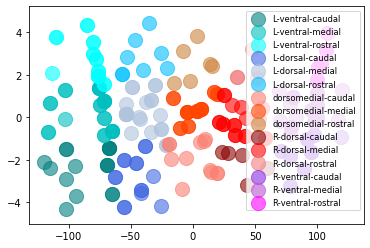

In [98]:
print('printing clusters in unrolled PAG, split along rostral/caudal axis')
fig, ax = plt.subplots()
for lab in labdict:
    ix = np.where(pag_clust2 == labdict[lab]) # flip x axis for visualization
    ax.scatter(pag_degree[ix], z[ix], c=cdict[lab], label=lab, s=200, alpha=.6) # pag_degree flipped to put left PAG on left side of graph.
plt.legend(loc='upper right', fontsize ='small')
plt.savefig(os.path.join(out_dir, 'PAG_15cat_unrolled.png'))
plt.show()


In [100]:


print('saving Niftis of clusters in unrolled PAG, split along rostral/caudal axis')
# Fill back in the kmeans labels into the original mask.
roi_data = np.zeros(roi_img.shape)
roi_data[roi_img.get_fdata() >= thresh] = pag_clust2
nib.save(nib.Nifti1Image(roi_data, roi_img.affine, roi_img.header), os.path.join(out_dir, 'PAG_15cat_' + "allClusters.nii.gz")) # all clusters.
for lab in labdict: 
    # save separate kmean clusters.
    roi_data_k = np.zeros(roi_img.shape)
    roi_data_k[np.where(roi_data == labdict[lab])] = 1
    nib.save(nib.Nifti1Image(roi_data_k, roi_img.affine, roi_img.header), os.path.join(out_dir, 'PAG_15cat_' + lab +'.nii.gz'))
    # save smoothed contrast.


saving Niftis of clusters in unrolled PAG, split along rostral/caudal axis


/Users/chendanlei/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater_equal
  after removing the cwd from sys.path.
